In [1]:
import tensorflow as tf
import tensorflow.keras as keras

In [2]:
ds_train = keras.preprocessing.image_dataset_from_directory(
    'data/',
    labels = 'inferred',
    label_mode = 'int',
    color_mode= 'rgb',
    image_size= (256,256),
    shuffle= True,
    validation_split= 0.1,
    seed=123,
    subset='training',
)

ds_val = keras.preprocessing.image_dataset_from_directory(
    'data/',
    labels = 'inferred',
    label_mode = 'int',
    color_mode= 'rgb',
    image_size= (256,256),
    shuffle= True,
    validation_split= 0.1,
    seed=123,
    subset='validation',
)

Found 29700 files belonging to 3 classes.
Using 26730 files for training.
Found 29700 files belonging to 3 classes.
Using 2970 files for validation.


In [3]:
#making conv model

inputs = keras.Input(shape=(256,256,3))
x= keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x= keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu')(x)
x= keras.layers.MaxPooling2D(pool_size=2)(x)
x= keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu')(x)
x= keras.layers.MaxPooling2D(pool_size=2)(x)
x= keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu')(x)
x= keras.layers.MaxPooling2D(pool_size=2)(x)
x= keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu')(x)
x= keras.layers.Flatten()(x)
x= keras.layers.Dropout(0.5)(x)
outputs= keras.layers.Dense(3, activation='softmax')(x)
model = keras.Model(inputs=inputs,outputs=outputs)

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
rescaling (Rescaling)        (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       73856 

In [5]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

In [6]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath='synDataCNN.keras',
    save_best_only = True,
    monitor = 'val_loss'
    )
]

In [7]:
history = model.fit(
    ds_train,
    epochs=5,
    batch_size = 128,
    validation_data = ds_val,
    callbacks=callbacks
)

Epoch 1/5
836/836 [==============================] - 69s 75ms/step - loss: 0.2615 - accuracy: 0.9010 - val_loss: 0.1700 - val_accuracy: 0.9414
Epoch 2/5
836/836 [==============================] - 62s 74ms/step - loss: 0.1143 - accuracy: 0.9613 - val_loss: 0.0837 - val_accuracy: 0.9710
Epoch 3/5
836/836 [==============================] - 61s 73ms/step - loss: 0.0849 - accuracy: 0.9714 - val_loss: 0.0725 - val_accuracy: 0.9768
Epoch 4/5
836/836 [==============================] - 61s 73ms/step - loss: 0.0663 - accuracy: 0.9767 - val_loss: 0.0574 - val_accuracy: 0.9815
Epoch 5/5
836/836 [==============================] - 63s 75ms/step - loss: 0.0584 - accuracy: 0.9807 - val_loss: 0.0647 - val_accuracy: 0.9811


In [8]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [12]:
def prep(fp):
    # store = os.path.join('resizedData/','3')
    # os.chdir('D:/python/secondCNN/')
    img_sizeW = 256#125#100
    img_sizeH = 256#224
    img=cv2.imread(fp,cv2.IMREAD_COLOR)
    resized = cv2.resize(img,(img_sizeW,img_sizeH))
    #print((img_sizeW,img_sizeH))
    # os.chdir(store)
    # cv2.imwrite(i+'.jpg',resized)
    return resized.reshape(-1,img_sizeW,img_sizeH,3)

In [10]:
model = tf.keras.models.load_model('synDataCNN.keras')

In [13]:
cats = ['closeup','medium','wide']
outs = []
for img in os.listdir('shotdeck/'):
    pred = model.predict(prep('shotdeck/'+img))
    output = cats[np.argmax(pred)]
    outs.append(output)

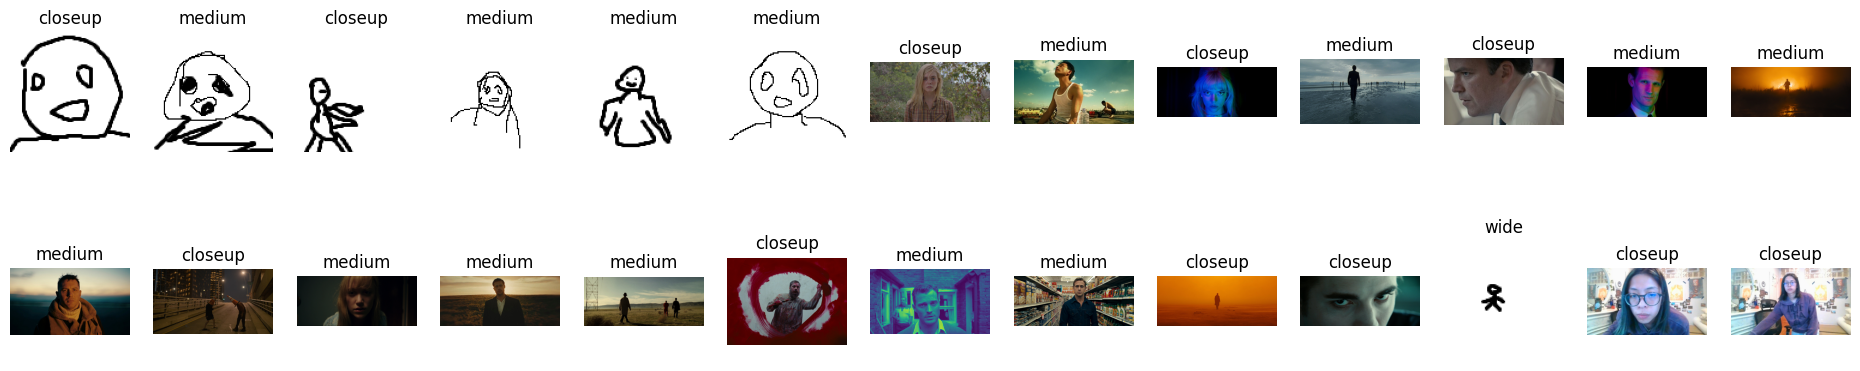

In [14]:
for i,image in enumerate(os.listdir('shotdeck/')):
    plt.subplot(2,13,i+1)
    plt.axis('off')
    img=plt.imread('shotdeck/'+image)
    
    plt.imshow(img)
    plt.title(outs[i])

plt.subplots_adjust(bottom=0.1, right=3, top=0.9)
plt.show()